In [2]:
library(Seurat)
library(tidyverse)
library(Matrix)
library(scales)
library(cowplot)
library(RCurl)

Attaching SeuratObject

── Attaching packages ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.2
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.4     ✔ forcats 1.0.0
── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack



Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor



Attaching package: ‘RCurl’


The following object is masked 

In [3]:
# read in data, including all complexity
path <- "SeuratOut/integrated-allcomplexity-clustered.rds"
data <- readRDS(path)
DefaultAssay(data) <- "RNA"

In [5]:
secretory <- subset(data, ident = c("0","3", "4", "13", "17","18"))
basal <- subset(data,ident = c("1","11")) # may not be diff/interesting
mesoderm <- subset(data,ident=c("2","6","7","9","16"))
secretory <- DietSeurat(secretory, assays = "RNA")
basal <- DietSeurat(basal, assays = "RNA")
mesoderm <- DietSeurat(mesoderm, assays = "RNA")

In [7]:
# sct transform
data <- secretory
split_ob <- SplitObject(data,split.by='orig.ident')
for (i in 1:length(split_ob)){
    split_ob[[i]] <- NormalizeData(split_ob[[i]],verbose=TRUE)
    split_ob[[i]] <- SCTransform(split_ob[[i]],vars.to.regress=c('mitoRatio'))
}
Top3000Features <- SelectIntegrationFeatures(object.list=split_ob,nfeatures=3000)
split_ob <- PrepSCTIntegration(object.list=split_ob,anchor.features=Top3000Features)
# identify anchors, or mutual nearest neighbors (MNNs) across samples 'best buddies'
    # best buddies in reciproal analysis will be used as anchors to 'merge' two groups 
    # filter anchors by overlapping their neighborhood cells (-> if good anchors, their neighborhood cells should be similar too)
anchors <- FindIntegrationAnchors(object.list=split_ob,normalization.method='SCT',anchor.features=Top3000Features)

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 8815 by 97

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 97 cells



  |======================================================================| 100%


Found 35 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 8815 genes



  |======================================================================| 100%


Computing corrected count matrix for 8815 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 6.793477 secs

Determine variable features

Place corrected count matrix in counts slot

Regressing out mitoRatio

Centering data matrix

Set default assay to SCT

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 11582 by 251

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 251 cells



  |======================================================================| 100%


Found 56 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 11582 genes



  |======================================================================| 100%


Computing corrected count matrix for 11582 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 9.422463 secs

Determine variable features

Place corrected count matrix in counts slot

Regressing out mitoRatio

Centering data matrix

Set default assay to SCT

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 5739 by 44

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 44 cells



  |======================================================================| 100%


Found 27 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 5739 genes



  |======================================================================| 100%


Computing corrected count matrix for 5739 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 3.474538 secs

Determine variable features

Place corrected count matrix in counts slot

Regressing out mitoRatio

Centering data matrix

Set default assay to SCT

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 10494 by 133

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 133 cells



  |======================================================================| 100%


Found 36 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 10494 genes



  |======================================================================| 100%


Computing corrected count matrix for 10494 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 5.787596 secs

Determine variable features

Place corrected count matrix in counts slot

Regressing out mitoRatio

Centering data matrix

Set default assay to SCT

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 8297 by 100

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 100 cells



  |======================================================================| 100%


Found 30 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 8297 genes



  |======================================================================| 100%


Computing corrected count matrix for 8297 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 6.468285 secs

Determine variable features

Place corrected count matrix in counts slot

Regressing out mitoRatio

Centering data matrix

Set default assay to SCT

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 9471 by 328

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 328 cells



  |======================================================================| 100%


Found 62 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 9471 genes



  |======================================================================| 100%


Computing corrected count matrix for 9471 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 13.37319 secs

Determine variable features

Place corrected count matrix in counts slot

Regressing out mitoRatio

Centering data matrix

Set default assay to SCT

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 10145 by 131

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 131 cells



  |======================================================================| 100%


Found 45 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 10145 genes



  |======================================================================| 100%


Computing corrected count matrix for 10145 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 6.247614 secs

Determine variable features

Place corrected count matrix in counts slot

Regressing out mitoRatio

Centering data matrix

Set default assay to SCT

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 9966 by 121

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 121 cells



  |======================================================================| 100%


Found 28 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 9966 genes



  |======================================================================| 100%


Computing corrected count matrix for 9966 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 5.599587 secs

Determine variable features

Place corrected count matrix in counts slot

Regressing out mitoRatio

Centering data matrix

Set default assay to SCT

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 9424 by 97

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 97 cells



  |======================================================================| 100%


Found 24 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 9424 genes



  |======================================================================| 100%


Computing corrected count matrix for 9424 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 4.863942 secs

Determine variable features

Place corrected count matrix in counts slot

Regressing out mitoRatio

Centering data matrix

Set default assay to SCT

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 11804 by 300

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 300 cells



  |======================================================================| 100%


Found 42 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 11804 genes



  |======================================================================| 100%


Computing corrected count matrix for 11804 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 12.99919 secs

Determine variable features

Place corrected count matrix in counts slot

Regressing out mitoRatio

Centering data matrix

Set default assay to SCT

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 11045 by 191

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 191 cells



  |======================================================================| 100%


Found 78 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 11045 genes



  |======================================================================| 100%


Computing corrected count matrix for 11045 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 9.16917 secs

Determine variable features

Place corrected count matrix in counts slot

Regressing out mitoRatio

Centering data matrix

Set default assay to SCT

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 7900 by 64

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 64 cells



  |======================================================================| 100%


Found 18 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 7900 genes



  |======================================================================| 100%


Computing corrected count matrix for 7900 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 4.306309 secs

Determine variable features

Place corrected count matrix in counts slot

Regressing out mitoRatio

Centering data matrix

Set default assay to SCT

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 11188 by 278

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 278 cells



  |======================================================================| 100%


Found 54 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 11188 genes



  |======================================================================| 100%


Computing corrected count matrix for 11188 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 12.3146 secs

Determine variable features

Place corrected count matrix in counts slot

Regressing out mitoRatio

Centering data matrix

Set default assay to SCT

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 3696 by 32

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 32 cells



  |======================================================================| 100%


Found 3 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 3696 genes



  |======================================================================| 100%


Computing corrected count matrix for 3696 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 4.074634 secs

Determine variable features

Place corrected count matrix in counts slot

Regressing out mitoRatio

Centering data matrix

Set default assay to SCT

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 9674 by 221

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 221 cells



  |======================================================================| 100%


Found 25 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 9674 genes



  |======================================================================| 100%


Computing corrected count matrix for 9674 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 7.579086 secs

Determine variable features

Place corrected count matrix in counts slot

Regressing out mitoRatio

Centering data matrix

Set default assay to SCT

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 9055 by 142

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 142 cells



  |======================================================================| 100%


Found 55 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 9055 genes



  |======================================================================| 100%


Computing corrected count matrix for 9055 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 8.195371 secs

Determine variable features

Place corrected count matrix in counts slot

Regressing out mitoRatio

Centering data matrix

Set default assay to SCT

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 7568 by 84

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 84 cells



  |======================================================================| 100%


Found 73 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 7568 genes



  |======================================================================| 100%


Computing corrected count matrix for 7568 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 3.676078 secs

Determine variable features

Place corrected count matrix in counts slot

Regressing out mitoRatio

Centering data matrix

Set default assay to SCT

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 8685 by 172

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 172 cells



  |======================================================================| 100%


Found 43 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 8685 genes



  |======================================================================| 100%


Computing corrected count matrix for 8685 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 9.760893 secs

Determine variable features

Place corrected count matrix in counts slot

Regressing out mitoRatio

Centering data matrix

Set default assay to SCT

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 15293 by 3560

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 3560 cells



  |======================================================================| 100%


Found 127 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 15293 genes



  |======================================================================| 100%


Computing corrected count matrix for 15293 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 1.927239 mins

Determine variable features

Place corrected count matrix in counts slot

Regressing out mitoRatio

Centering data matrix

Set default assay to SCT

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 14856 by 2168

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 2168 cells



  |======================================================================| 100%


There are 14 estimated thetas smaller than 1e-07 - will be set to 1e-07

Found 142 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 14856 genes



  |======================================================================| 100%


Computing corrected count matrix for 14856 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 1.174809 mins

Determine variable features

Place corrected count matrix in counts slot

Regressing out mitoRatio

Centering data matrix

Set default assay to SCT

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 11479 by 2825

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 2825 cells



  |======================================================================| 100%


Found 107 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 11479 genes



  |======================================================================| 100%


Computing corrected count matrix for 11479 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 1.358284 mins

Determine variable features

Place corrected count matrix in counts slot

Regressing out mitoRatio

Centering data matrix

Set default assay to SCT

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 11432 by 2810

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 2810 cells



  |======================================================================| 100%


Found 107 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 11432 genes



  |======================================================================| 100%


Computing corrected count matrix for 11432 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 1.433668 mins

Determine variable features

Place corrected count matrix in counts slot

Regressing out mitoRatio

Centering data matrix

Set default assay to SCT

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 11041 by 3179

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 3179 cells



  |======================================================================| 100%


Found 95 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 11041 genes



  |======================================================================| 100%


Computing corrected count matrix for 11041 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 1.612011 mins

Determine variable features

Place corrected count matrix in counts slot

Regressing out mitoRatio

Centering data matrix

Set default assay to SCT

Finding all pairwise anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 479 anchors

Filtering anchors

Warning message in FilterAnchors(object = object.pair, assay = assay, slot = slot, :
“Number of anchor cells is less than k.filter. Retaining all anchors.”
Running CCA

Warning message in irlba(A = mat3, nv = num.cc):
“You're computing too large a percentage of total singular values, use a standard svd instead.”
Merging objects

Finding neighborhoods

Finding anchors

	Found 220 anchors

Filtering anchors

Warning message in FilterAnchors(object = object.pair, assay = assay, slot = slot, :
“Number of anchor cells is less than k.filter. Retaining all anchors.”
Running CCA

Warning message in irlba(A = mat3, nv = num.cc):
“Y

ERROR: Error in idx[i, ] <- res[[i]][[1]]: number of items to replace is not a multiple of replacement length


In [11]:
# cell types only present in one sample will remain sample-specific!
# k.weight has to be small (since some samples have low cell count)
data <- IntegrateData(anchorset = anchors, normalization.method='SCT',k.weight=10)
data <- FindVariableFeatures(data, selection.method='vst',nfeatures=3000)
top10 <- head(VariableFeatures(data),10)
plot1 <- VariableFeaturePlot(data)
plot2 <- LabelPoints(plot=plot1,points=top10,repel=TRUE)

Merging dataset 3 into 1

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data

Merging dataset 1 3 into 19

Warning message:
“Attempting to merge an SCTAssay with another Assay type 
Converting all to standard Assay objects.”
Extracting anchors for merged samples

Warning message:
“Attempting to merge an SCTAssay with another Assay type 
Converting all to standard Assay objects.”
Finding integration vectors

Finding integration vector weights

Integrating data

Merging dataset 12 into 2

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data

Merging dataset 14 into 4

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data

Merging dataset 4 14 into 20

Warning message:
“Attempting to merge an SCTAssay with another Assay type 
Converting all to standard Assay objects.”
Extracting anchors 

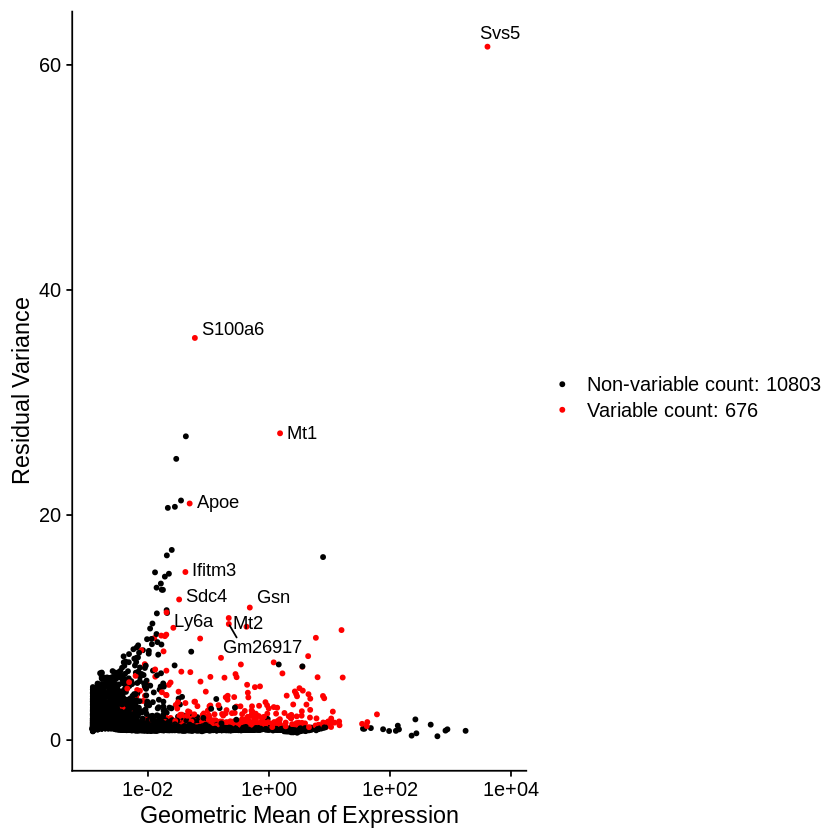

In [13]:
plot2

In [14]:
data <- RunPCA(data,features=VariableFeatures(object=data))

PC_ 1 
Positive:  Svs5, Gm26917, Gm42418, mt-Cytb, mt-Co3, Bglap3, mt-Nd4, mt-Atp6, mt-Nd2, mt-Co1 
	   mt-Nd1, Lars2, Snhg20, mt-Nd5, mt-Atp8, Clec2d, Ddit4, Tbx2, Gpr150, AY036118 
	   Rab43, Wdr74, Tspyl2, Aarsd1, mt-Nd3, U2af1l4, Swt1, Gm47283, Slc12a2, Txnip 
Negative:  Actg1, Mt1, H3f3b, Actb, Malat1, Fth1, Tmsb4x, Atf3, Mt2, Hspa5 
	   Krt8, Krt18, S100a6, Cldn4, Ifrd1, Hspb1, Sdc4, Jund, Cebpb, Ftl1 
	   Nfkbia, Hsp90ab1, Csrp1, Junb, Rpl13, Klf6, Errfi1, Rps4x, Egr1, Rps3a1 
PC_ 2 
Positive:  Svs5, Mt1, S100a6, Mt2, Apoe, Sdc4, Ifitm3, S100a10, Ahnak, Ifitm2 
	   Anxa2, Rhoc, Krt17, Gsn, Arpc1b, Cd63, Sfn, Lcn2, Ptgs2, Sat1 
	   Fxyd3, Cebpd, Cebpb, Timp3, Cd81, Fth1, Actg1, Ly6a, Ier3, Rbpms 
Negative:  Hspb1, Hspa1a, Fos, Hsp90aa1, Dnajb1, Jun, Atf3, Hspa8, Hspa1b, Hsp90ab1 
	   Klf2, Ier2, Btg2, Hspe1, Hspd1, Klf6, Cryab, Dnaja1, Hspa5, Ubc 
	   Hsph1, Egr1, Herpud1, Ppp1r15a, Chka, Fosb, Rhob, Sgk1, H3f3b, Phlda1 
PC_ 3 
Positive:  Svs5, Hspa1a, Gstm1, Cst3, Gstm2, Wfdc15b

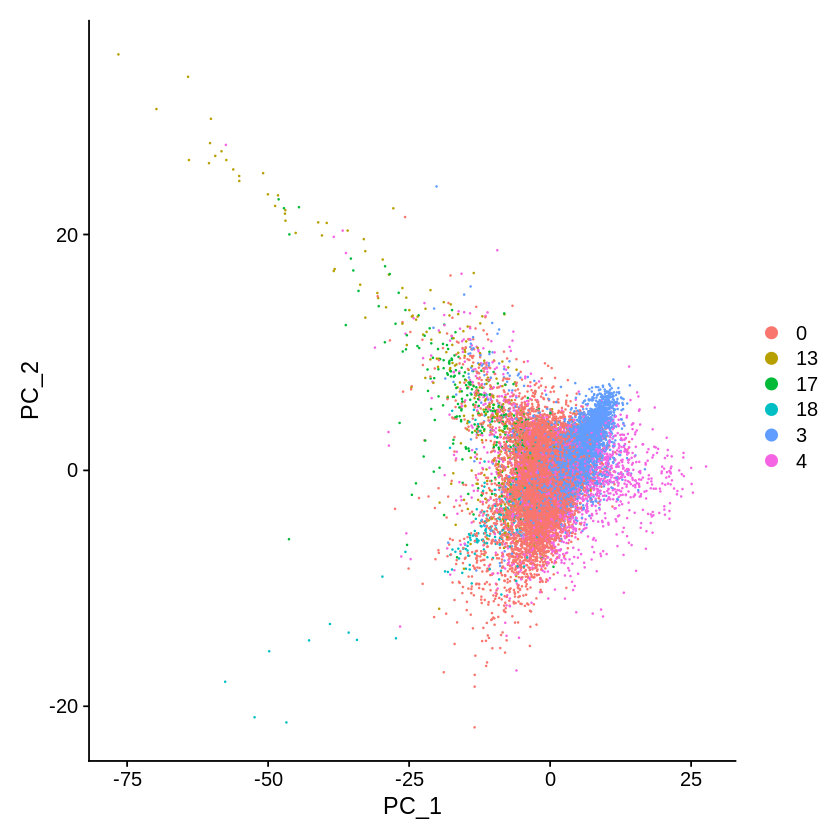

In [15]:
# DimPlot(data, reduction='pca')
DimPlot(data, reduction='pca')

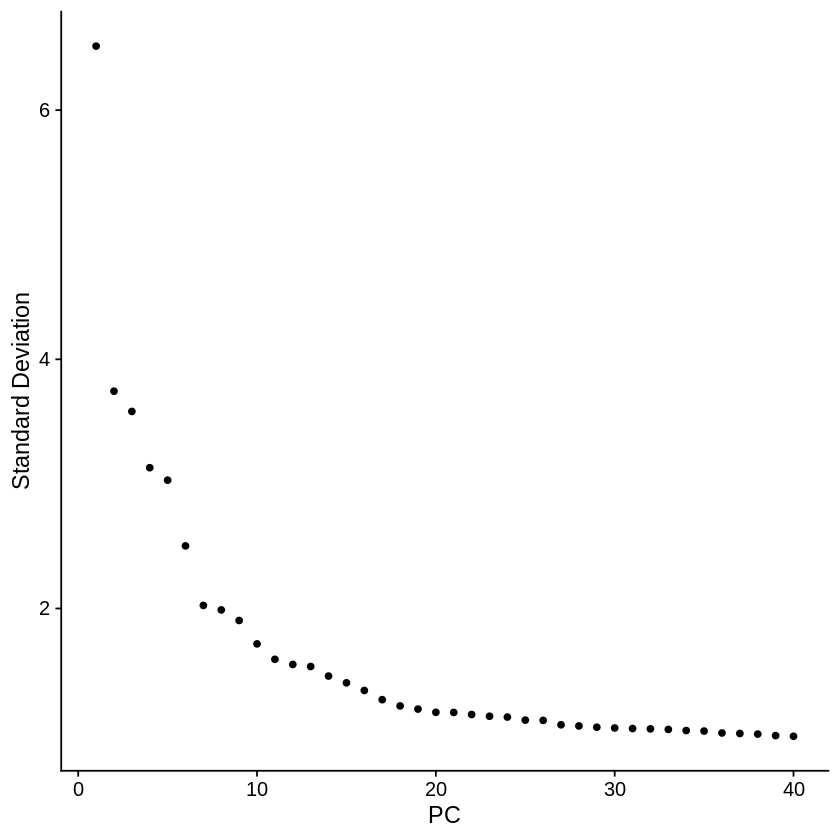

In [16]:
ElbowPlot(data,ndim=40)

In [32]:
# cluster the cells
data <- FindNeighbors(data, dims=1:30)
data <- FindClusters(data, resolution = c(0.1,0.2,0.4,0.6,0.8,1.0,1.4))
# visualize in UMAP
data <- RunUMAP(data, dims=1:30,n.neighbors=30,min.dist=0.2)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 17328
Number of edges: 761486

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9255
Number of communities: 6
Elapsed time: 3 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 17328
Number of edges: 761486

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9020
Number of communities: 10
Elapsed time: 4 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 17328
Number of edges: 761486

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8721
Number of communities: 13
Elapsed time: 4 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 17328
Number of edges: 761486

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8498
Number of communities: 16
Elapsed time: 3 seconds
Modularity Op

21:52:37 UMAP embedding parameters a = 1.262 b = 1.003

21:52:37 Read 17328 rows and found 30 numeric columns

21:52:37 Using Annoy for neighbor search, n_neighbors = 30

21:52:37 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

21:52:39 Writing NN index file to temp file /tmp/RtmpjyYQFN/file156ce0752234c8

21:52:39 Searching Annoy index using 1 thread, search_k = 3000

21:52:45 Annoy recall = 100%

21:52:46 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

21:52:47 Initializing from normalized Laplacian + noise (using irlba)

21:52:48 Commencing optimization for 200 epochs, with 817056 positive edges

21:52:57 Optimization finished



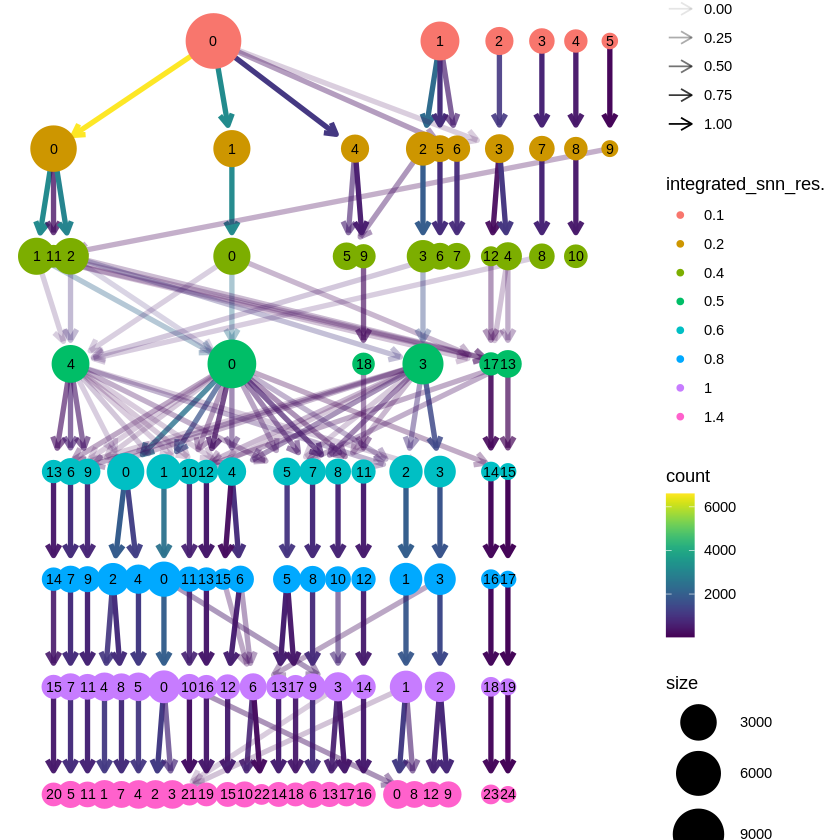

In [33]:
library(clustree)
clustree(data,prefix="integrated_snn_res.")

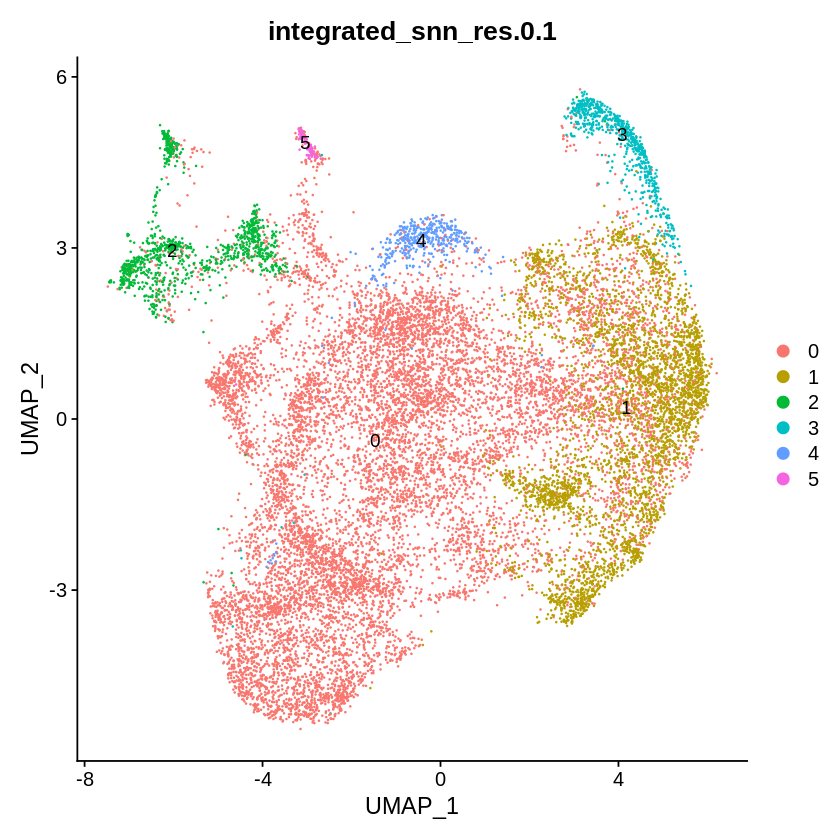

In [35]:
DimPlot(data, reduction='umap',label=TRUE,group.by="integrated_snn_res.0.1")

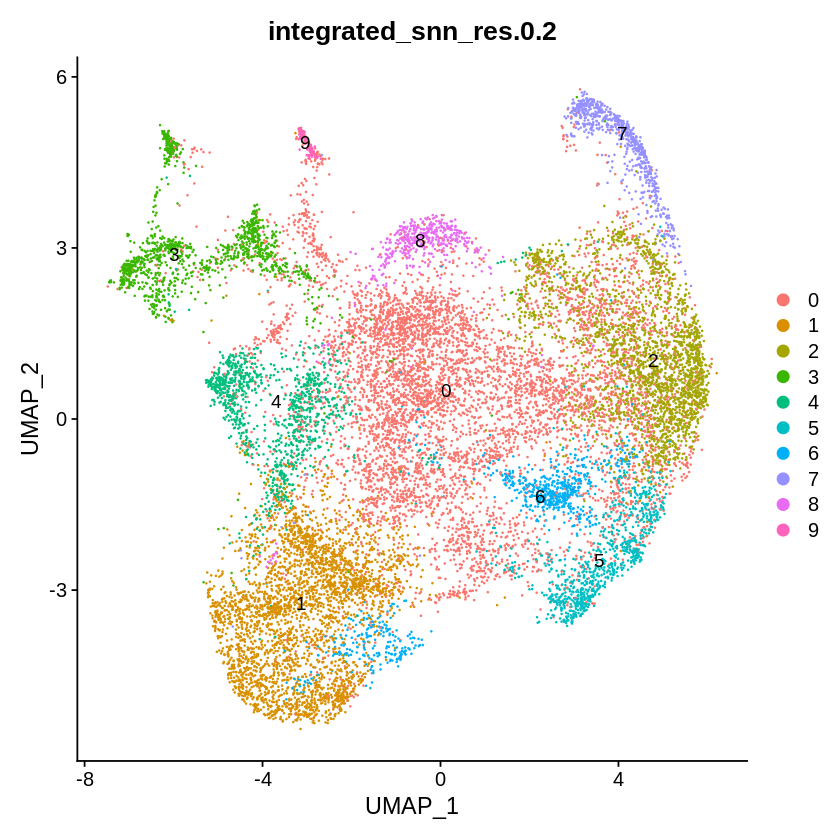

In [41]:
DimPlot(data, reduction='umap',label=TRUE,group.by="integrated_snn_res.0.2")

Warning message:
“The sort.cell parameter is being deprecated. Please use the order parameter instead for equivalent functionality.”


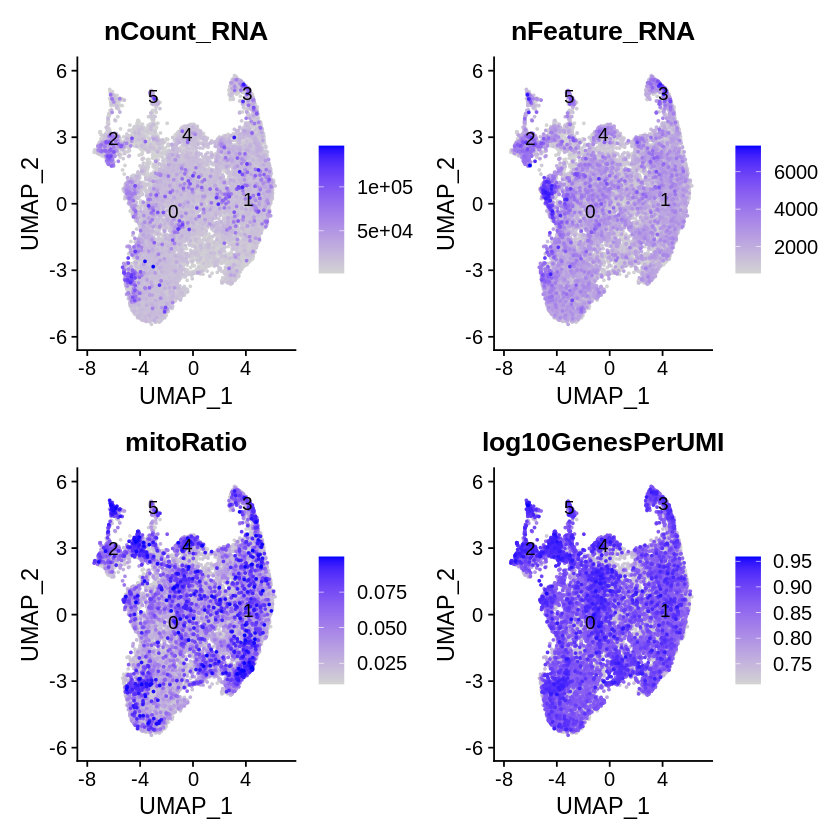

In [40]:
# 0.1 is better
Idents(data) <- "integrated_snn_res.0.1"
metric <- c('nCount_RNA','nFeature_RNA','mitoRatio','log10GenesPerUMI')
FeaturePlot(data,reduction='umap',
            features=metric,pt.size=0.4,
            sort.cell=TRUE,min.cutoff='q10',label=TRUE)

Warning message:
“`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information.”


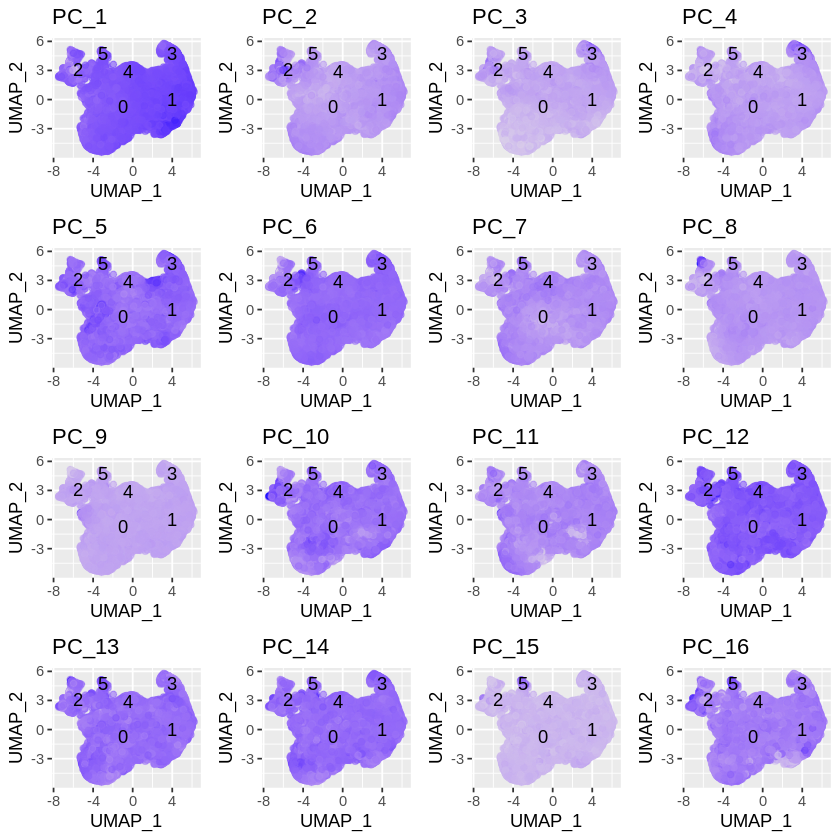

In [42]:
# see how PC (linear space) seperate the clusters/cell types
columns <- c(paste0("PC_", 1:16),
            'ident',
            'UMAP_1',
            'UMAP_2')
pc_data <- FetchData(data, vars=columns)
# this is resolution 0.5
umap_label <- FetchData(data, vars=c('ident',"UMAP_1","UMAP_2")) %>%
    group_by(ident) %>%
    summarise(x=mean(UMAP_1), y=mean(UMAP_2))
map(paste0("PC_",1:16), function(pc){
    ggplot(pc_data,
          aes(UMAP_1,UMAP_2)) +
            geom_point(aes_string(color=pc),
                      alpha=0.6) +
            scale_color_gradient(guide="none",
                                low='grey90',
                                high='blue') +
            geom_text(data=umap_label,
                     aes(label=ident,x,y)) +
            ggtitle(pc)
}) %>%
        plot_grid(plotlist = .)

Warning message in FetchData.Seurat(object = object, vars = features, cells = cells):
“The following requested variables were not found (10 out of 30 shown): Gata1, Mrgprx2, Nkx2-5, Nppa, Crp, Alb, Ins2, Gcg, Try10, Cpa1”
Warning message:
“Removed 372 rows containing missing values (`geom_point()`).”


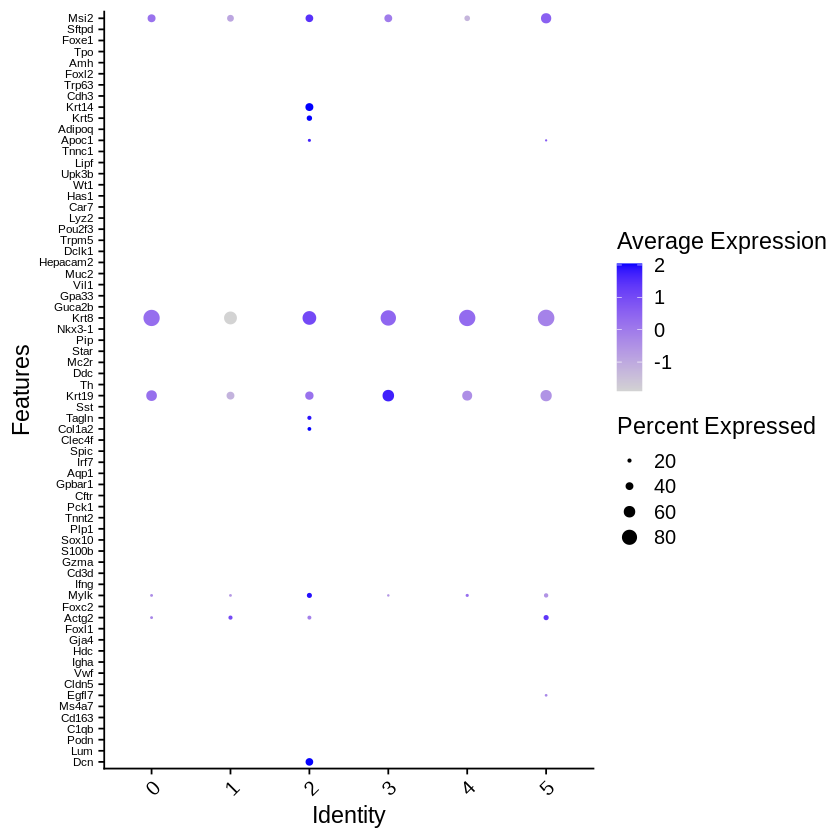

In [8]:
genes <- read.table("Markers-Genes.Mouse.txt",sep="\t")[,1]
DefaultAssay(data) <- "RNA"
DotPlot(data,features=unique(genes),dot.scale=4,dot.min=0.1) + RotatedAxis() + coord_flip() +
theme(axis.text.y=element_text(size=7))

In [45]:
# cluster 1 is empty??
annotations <- read.csv("mouse-gene-annotation.csv",sep="\t")
markers <-  FindAllMarkers(data, only.pos = TRUE, min.diff.pct = 0.25, min.pct = 0.25,
                           logfc.threshold = 0.25)
out <- markers %>%
           rownames_to_column(var = "gene_name") %>%
           left_join(y = unique(annotations[, c("gene_name", "description")]),
           by = c("gene" = "gene_name")) %>%
          dplyr::arrange(p_val_adj)

Calculating cluster 0

Calculating cluster 1

Warning message in FindMarkers.default(object = data.use, slot = data.slot, counts = counts, :
“No features pass logfc.threshold threshold; returning empty data.frame”
Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5



In [17]:
top10 <- out %>%
        group_by(cluster) %>%
        top_n(n=10,wt=avg_log2FC)

In [20]:
top10[top10$cluster==0,]

gene_name,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene,description
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>,<chr>
Atf3,0,0.4831396,0.894,0.621,0,0,Atf3,activating transcription factor 3 [Source:MGI Symbol;Acc:MGI:109384]


In [52]:
output <- "SeuratOut/integrated-allcomplexity-secretory.rds"
saveRDS(data,file=output)
saveRDS(out,file='AllMarkers.secretory.rds')

In [3]:
data <- readRDS("SeuratOut/integrated-allcomplexity-secretory.rds")
out <- readRDS("AllMarkers.secretory.rds")

Warning message:
“The sort.cell parameter is being deprecated. Please use the order parameter instead for equivalent functionality.”


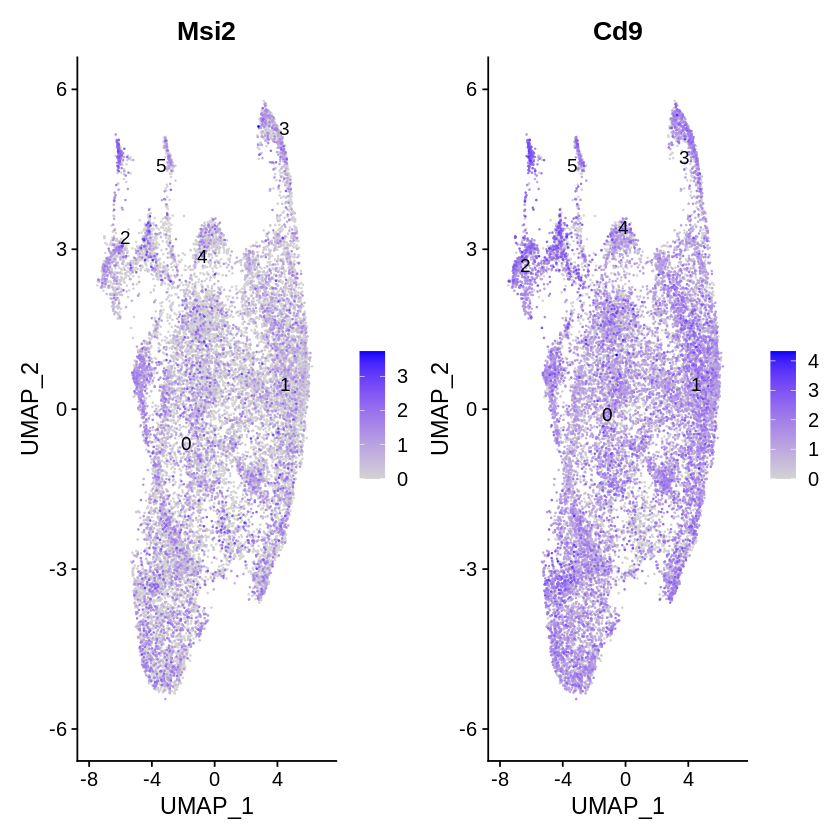

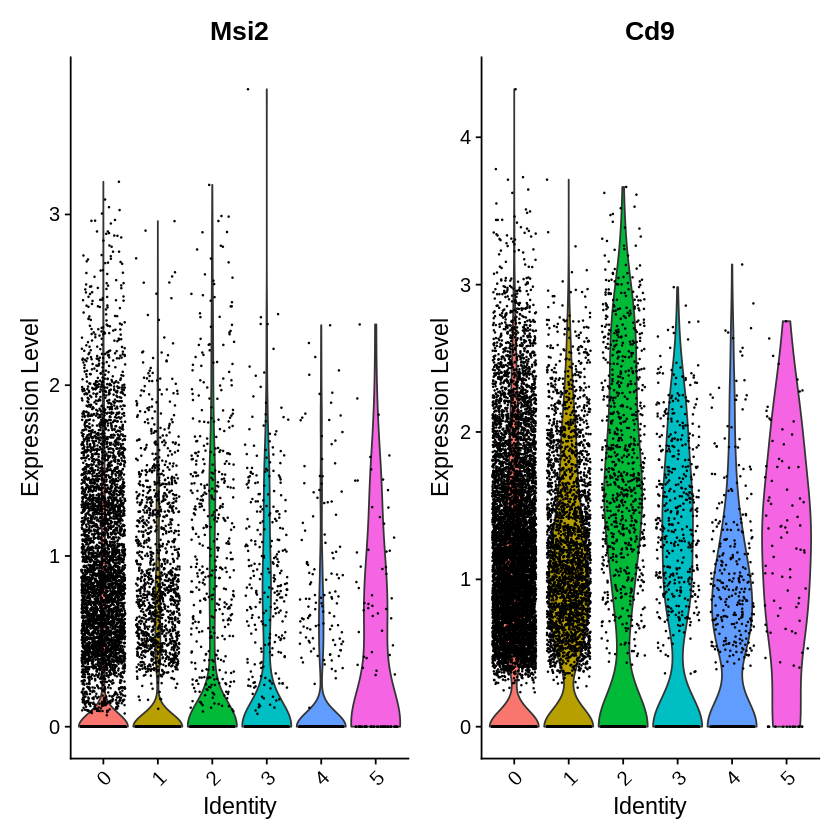

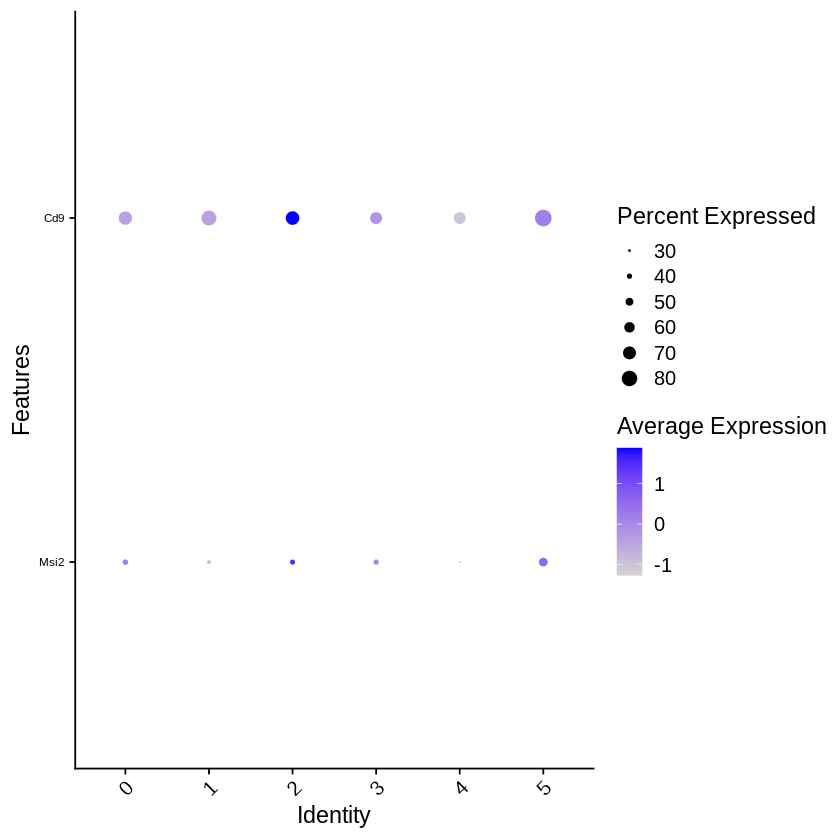

In [12]:
# Msi2 is epithelial migration factor, found in epithelial SV proteomic paper 10.1016/j.mcpro.2021.100107 
# https://www.genecards.org/cgi-bin/carddisp.pl?gene=MSI2#orthologs
DefaultAssay(data) <- "RNA"
features <- c("Msi2","Cd9")
 
FeaturePlot(data, 
            reduction = "umap", 
            features = features,
            label = TRUE, 
            sort.cell = TRUE,
            repel = TRUE)
VlnPlot(object = data, 
        features = features)
DotPlot(data,features=features,dot.scale=4,dot.min=0.1) + RotatedAxis() + coord_flip() +
    theme(axis.text.y=element_text(size=7))

Warning message in FetchData.Seurat(object = object, vars = features, cells = cells):
“The following requested variables were not found: Spink3, Alb, Gin, Serpina3k, Mug1, Apoa4, Dip, Ces1c, Plg”
Warning message:
“Removed 54 rows containing missing values (`geom_point()`).”


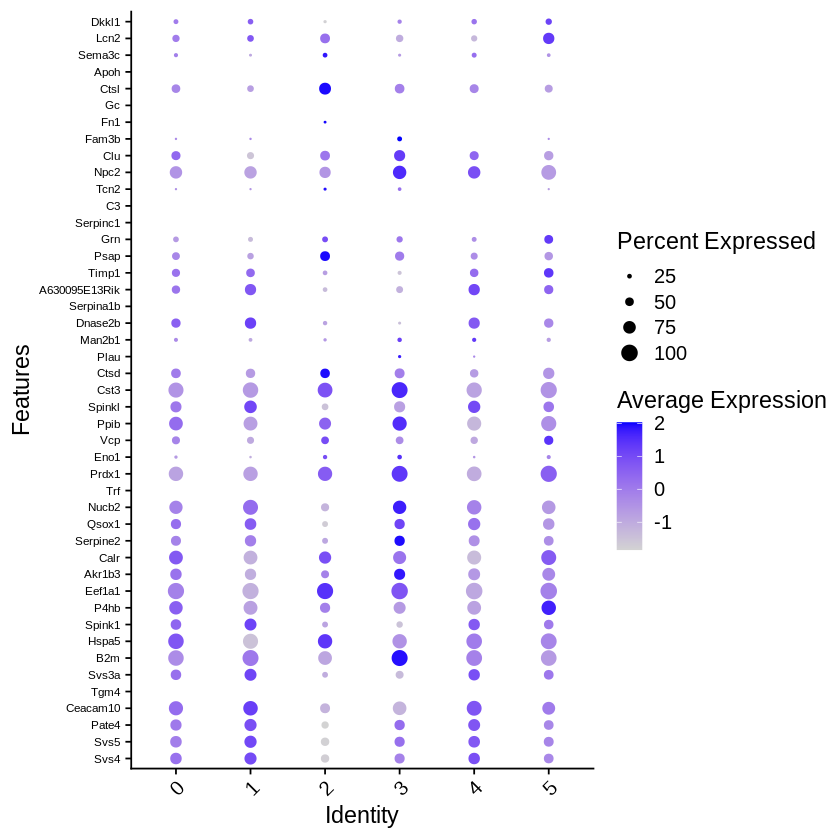

In [13]:
genes <- read.table("sv-genes.txt",sep="\t")[,1]
DefaultAssay(data) <- "RNA"
DotPlot(data,features=unique(genes),dot.scale=4,dot.min=0.1) + RotatedAxis() + coord_flip() +
theme(axis.text.y=element_text(size=7))